# <h1> Analyzing Relationships between Race, Violent Crime Rates, and Police Killings throughout the United States from 2010 census 
<h3> by Tessa de Vries

In [3]:
import statistics 

<h2>Does a higher rate of violent crime make it more likely for police to kill people?  

<_io.TextIOWrapper name='PoliceViolence_city.csv' mode='r' encoding='UTF-8'>
[8.8, 3.2, 8.6, 4.8, 12.3, 4.1, 4.0, 4.6, 13.4, 9.2, 15.9, 7.3, 12.3, 1.8, 5.9, 4.3, 8.8, 2.4, 9.1, 13.3, 4.6, 5.5, 6.6, 6.6, 6.0, 19.9, 7.3, 3.9, 3.2, 5.6, 1.2, 4.6, 2.7, 3.9, 4.8, 1.6, 3.3, 7.7, 9.9, 12.5, 0.5, 2.2, 6.8, 5.3, 12.5, 3.9, 8.4, 3.3, 3.4, 4.9, 4.9, 5.9, 8.6, 3.4, 17.4, 4.6, 10.6, 14.8, 10.1, 11.2, 9.7, 6.0, 10.8, 5.2, 7.8, 16.9, 7.7, 5.6, 9.0, 10.2, 5.7, 8.0, 1.7, 4.7, 3.9, 4.9, 4.3, 8.4, 6.1, 5.4, 9.9, 3.8, 8.0, 3.2, 3.7, 1.5, 6.0, 5.5, 16.8, 6.6, 8.6, 13.3, 5.8, 10.9, 6.4, 8.1, 1.5, 11.9, 7.9, 7.1]
[27.5, 23.8, 20.6, 13.7, 16.7, 33.8, 21.5, 46.0, 41.9, 21.8, 23.6, 11.3, 0.0, 8.5, 15.0, 9.0, 20.4, 4.1, 33.7, 15.1, 7.2, 29.2, 9.8, 23.4, 28.3, 12.6, 21.9, 16.9, 23.7, 20.2, 14.0, 32.3, 17.6, 22.1, 7.4, 19.4, 13.4, 23.7, 20.5, 28.0, 0.0, 18.5, 25.6, 12.1, 30.4, 16.9, 13.3, 10.1, 11.6, 34.6, 20.8, 15.1, 13.1, 25.7, 26.3, 27.3, 15.0, 16.8, 13.1, 11.6, 23.3, 7.0, 10.8, 45.3, 23.0, 20.5, 53.4, 31.8, 62

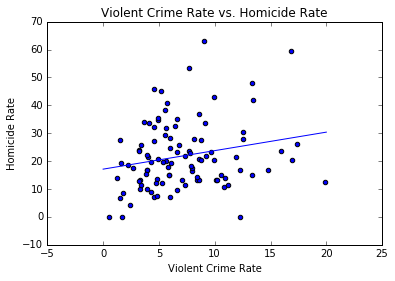

In [4]:
import scipy.stats as st 
import matplotlib.pyplot as plt 
%matplotlib inline 


file= open("PoliceViolence_city.csv", "r", errors="ignore")
print(file)
flist=[]
for i in file:
    flist.append(i)
violentcrimerate=[]
homiciderate=[]
del flist[0]
for j in range(len(flist)):
    flist[j]=flist[j].split(",")
    violentcrimerate.append(float(flist[j][18]))
    homiciderate.append(float(flist[j][20]))

print(violentcrimerate)
print(homiciderate)
    
regression= st.linregress(violentcrimerate, homiciderate)
slope= regression[0]
yint= regression[1]
print(regression[0],regression[1])
plt.plot([0, 20], [yint, slope*20+yint])


(st.linregress(violentcrimerate, homiciderate))
plt.scatter(violentcrimerate, homiciderate)

print(regression[2])

plt.xlabel("Violent Crime Rate")
plt.ylabel("Homicide Rate")
plt.title("Violent Crime Rate vs. Homicide Rate")

Based on the calculate r-value of 0.216, there is no correlation between violent crime rate and homicide rate which means we do not have sufficient evidence to support the claim that a higher rate of violent crime make it more likely for police to kill people. 

<h2> Does a larger black population by percentage make it more likely for police to kill black people?

<_io.TextIOWrapper name='PoliceViolence_city.csv' mode='r' encoding='UTF-8'>
-94.0150488645 73.6662367748
-0.258959696335


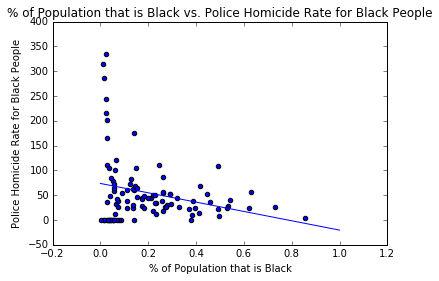

In [5]:
import scipy.stats as st 
import matplotlib.pyplot as plt 
%matplotlib inline 


file= open("PoliceViolence_city.csv", "r", errors="ignore")
print(file)
flist=[]
for i in file:
    flist.append(i)
percentage=[]
killrate=[]
del flist[0]
for j in range(len(flist)):
    flist[j]=flist[j].split(",")
    percentage.append(float(flist[j][6])/(float(flist[j][15])))
    killrate.append(float(flist[j][21]))


regression= st.linregress(percentage, killrate)
slope= regression[0]
yint= regression[1]
print(regression[0],regression[1])
plt.plot([0, 1], [yint, slope*1+yint])
(st.linregress(percentage, killrate))
plt.scatter(percentage, killrate)
print(regression[2])

plt.xlabel("% of Population that is Black")
plt.ylabel("Police Homicide Rate for Black People")
plt.title("% of Population that is Black vs. Police Homicide Rate for Black People")

   

Based on the calculate r-value of -0.259, there is no correlation between a larger black population by percentage and  the likelihood of police to kill black people which means we do not have sufficient evidence to support the claim that a larger population of black people (by %) makes it more likely for police to kill black people. In fact the graph supports the idea that a larger population of black people by percentage decreases the chance of police killing black people. 

<h2> In which state are you most likely to be killed by police if you are of any race?

In [6]:
import operator
import scipy.stats as st 
import matplotlib.pyplot as plt 
%matplotlib inline 

file1=open("states.csv", "r", errors="ignore")

file= open("KilledbyPolice.csv", "r", errors="ignore")
print(file)
flist=[]
for i in file:
    flist.append(i)
state=[]
del flist[0]
for j in range(len(flist)):
    flist[j]=flist[j].split(",")
    state.append((flist[j][5].replace("\n","")))
    

statecount={}
for x in state:
    if x not in statecount:
        statecount[x]=[]
        statecount[x].append(1)
    else:
        statecount[x][0]+=1
del statecount['PN']
del statecount['1/21/14']


states=[]
for i in file1:
    states.append(i)

population=[]
statecodes=[]

for j in range(len(states)):
    states[j]=states[j].split(",")
    population.append(float(states[j][2]))
    statecodes.append((states[j][1]))

for i in range(len(population)):
    statecount[statecodes[i]].append(population[i])


for i in statecount:
    percent=statecount[i][0]/statecount[i][1]
    statecount[i].append(percent)


percent={}
for i in statecount:
    print(statecount[i])
    percent[i]=statecount[i][2]
    
sorted_x = sorted(percent.items(), key=operator.itemgetter(1), reverse=True)  

print(sorted_x)


<_io.TextIOWrapper name='KilledbyPolice.csv' mode='r' encoding='UTF-8'>
[107, 7170351.0, 1.492256097365387e-05]
[37, 2978204.0, 1.2423594891417781e-05]
[4, 626042.0, 6.389347679548656e-06]
[75, 9922576.0, 7.558521093715987e-06]
[5, 1056298.0, 4.7335127019079845e-06]
[20, 1654930.0, 1.2085103297420434e-05]
[38, 1844128.0, 2.060594492356279e-05]
[17, 738432.0, 2.3021754203501473e-05]
[85, 4858979.0, 1.7493386985208208e-05]
[113, 19795791.0, 5.708284149898329e-06]
[89, 6600299.0, 1.3484237608023516e-05]
[44, 6794422.0, 6.47590037828089e-06]
[23, 1032949.0, 2.2266346160362225e-05]
[348, 20271272.0, 1.7167151622256363e-05]
[130, 10042802.0, 1.2944594546422403e-05]
[14, 586107.0, 2.3886423468752294e-05]
[117, 11613423.0, 1.0074549079974095e-05]
[42, 2995919.0, 1.4019070609051847e-05]
[115, 12859995.0, 8.942460708577259e-06]
[23, 3590886.0, 6.405104478393355e-06]
[98, 5456574.0, 1.7959987347372178e-05]
[107, 3911338.0, 2.7356367565267946e-05]
[54, 5771337.0, 9.356584098277402e-06]
[71, 838299

New Mexico has the highest ratio of people killed by police to population of the state which means you (disregarding race) are most likely to be killed by a police in New Mexico over another US state. 

<h2> In which state are you most likely to be killed by police if you are black?


In [30]:

state_codes_black=[]
recalibration= 0

for i in range(len(flist)):
    if flist[i][3][0:3]=="Bla":
        state_codes_black.append(recalibration)
        state_codes_black[recalibration]= flist[i][5]
        recalibration+=1
        
state_count_black={}

for i in range(len(state_codes_black)):
    state_codes_black[i]=state_codes_black[i].replace("\n", "")

for x in state_codes_black:
    if x not in state_count_black:
        state_count_black[x] = []
        state_count_black[x].append(1)
    else:
        state_count_black[x][0]+=1


#help from Jacob

file=open("statess.csv", "r", errors="ignore")
STATE=[]
for i in file:
    STATE.append(i)
for j in range(len(STATE)):
    STATE[j]=STATE[j].split(",")


for x in STATE:
    if x[1] in state_count_black:
        state_count_black[x[1]].append(float(x[3]))

print(state_count_black)

del state_count_black["PN"]
for x in state_count_black:
    state_count_black[x][0] = state_count_black[x][0]/state_count_black[x][1]
   

percent1={}
for i in state_count_black:
    print(state_count_black[i])
    percent1[i]=state_count_black[i][0]
    
sorted_x = sorted(percent1.items(), key=operator.itemgetter(1), reverse=True)  
print(sorted_x)


{'WA': [11, 240042.0], 'AR': [9, 449895.0], 'RI': [2, 79719.0], 'NJ': [30, 1204826.0], 'AK': [2, 23263.0], 'AL': [36, 1251311.0], 'NY': [53, 3073800.0], 'TN': [21, 1055689.0], 'MA': [12, 528761.0], 'LA': [44, 1506534.0], 'FL': [125, 2999862.0], 'IL': [55, 1866414.0], 'OH': [52, 1407681.0], 'UT': [3, 29287.0], 'NC': [51, 2048628.0], 'SC': [24, 1290684.0], 'CO': [10, 362296.0], 'OK': [35, 277644.0], 'WI': [15, 359148.0], 'VA': [31, 1551399.0], 'IN': [24, 591397.0], 'CT': [4, 201737.0], 'MN': [11, 274412.0], 'MD': [56, 1798593.0], 'IA': [3, 89148.0], 'GA': [51, 3150435.0], 'KY': [11, 361273.0], 'NM': [3, 42550.0], 'TX': [92, 2979598.0], 'MS': [20, 1074200.0], 'PA': [29, 1377689.0], 'MO': [41, 704043.0], 'DC': [19, 305074.0], 'PN': [1], 'HI': [1, 21424.0], 'DE': [4, 191814.0], 'AZ': [15, 259008.0], 'WV': [4, 63124.0], 'NE': [6, 82885.0], 'CA': [115, 2299072.0], 'KS': [9, 167864.0], 'NV': [9, 255633.0], 'OR': [3, 69206.0], 'MI': [27, 1400362.0]}
[4.582531390340024e-05, 240042.0]
[2.00046677

The state of Oklahoma has the highest black people killled by police to black population ratio which means you are most likely to be killed by a police officer in Oklahoma if you are black. 

<h2> Does a larger white population by percentage make it more likely for police to kill black people?

In [ ]:
import scipy.stats as st 
import matplotlib.pyplot as plt 
%matplotlib inline 


file= open("PoliceViolence_city.csv", "r", errors="ignore")
print(file)
flist=[]
for i in file:
    flist.append(i)
percentage=[]
killrate=[]
del flist[0]
for j in range(len(flist)):
    flist[j]=flist[j].split(",")
    percentage.append(float(flist[j][7])/(float(flist[j][15])))
    killrate.append(float(flist[j][21]))

regression= st.linregress(percentage, killrate)
slope= regression[0]
yint= regression[1]
print(regression[0],regression[1])
plt.plot([0, 1], [yint, slope*1+yint])
(st.linregress(percentage, killrate))
plt.scatter(percentage, killrate)
print(regression[2])

plt.xlabel("% of Population that is White")
plt.ylabel("Police Homicide Rate for Black People")
plt.title("% of Population that is White vs. Police Homicide Rate for Black People")

   

Based on the calculate r-value of 0.104, there is no correlation between a larger white population by percentage and the likelihood of police to kill black people which means we do not have sufficient evidence to support the claim that a larger population of white people (by %) makes it more likely for police to kill black people. 

<h3> Conclusion: 



Based off the calculations made previously in the lab, there is not enough evidence to support the claim that a larger white population or a larger black population by % makes it more likely for police to kill black people. It was also calculated that someone of any race is most likely to be killed in New Mexico and that someone who is Black is most likely to be killed in Oklahoma. 